In [1]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture('data/all_videos/BE1_M_WIN_20240717_13_27_50_Pro.mp4')
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imshow('Pose Detection', frame)
    if cv2.waitKey(5) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object fi

In [3]:
def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
    if angle<0:
        angle += 360
    return angle

In [4]:
reference_A = 'reference/A.jpg'
reference_D = 'reference/D.jpg'
reference_G = 'reference/G.jpg'

Landmark 0 in pixel coordinates: x: 383, y: 246, z: -0.6385762095451355
Landmark 1 in pixel coordinates: x: 393, y: 234, z: -0.5958571434020996
Landmark 2 in pixel coordinates: x: 399, y: 235, z: -0.59587162733078
Landmark 3 in pixel coordinates: x: 405, y: 236, z: -0.5962741374969482
Landmark 4 in pixel coordinates: x: 372, y: 234, z: -0.5987660884857178
Landmark 5 in pixel coordinates: x: 364, y: 235, z: -0.5988703966140747
Landmark 6 in pixel coordinates: x: 357, y: 236, z: -0.5989709496498108
Landmark 7 in pixel coordinates: x: 410, y: 246, z: -0.35147973895072937
Landmark 8 in pixel coordinates: x: 348, y: 245, z: -0.3644641041755676
Landmark 9 in pixel coordinates: x: 394, y: 268, z: -0.5455436110496521
Landmark 10 in pixel coordinates: x: 367, y: 266, z: -0.5496971011161804
Landmark 11 in pixel coordinates: x: 458, y: 319, z: -0.25215786695480347
Landmark 12 in pixel coordinates: x: 300, y: 310, z: -0.2678692638874054
Landmark 13 in pixel coordinates: x: 547, y: 232, z: -0.36578

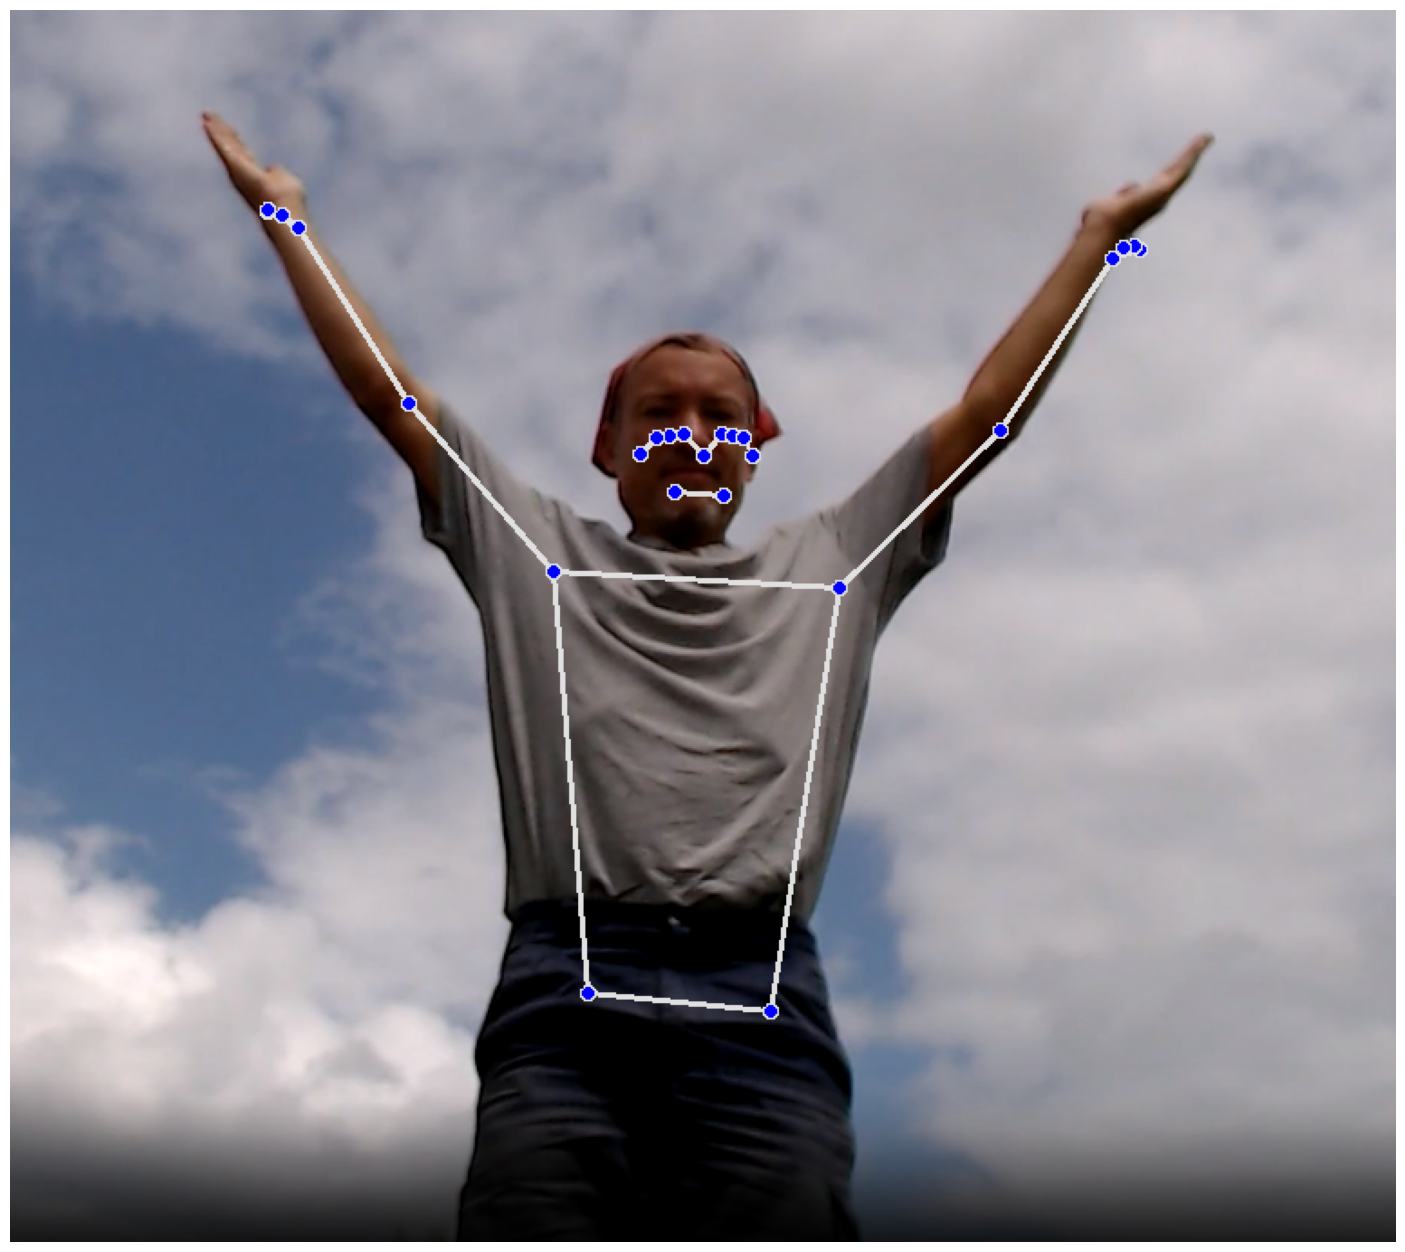

In [5]:
A_landmarks = []
frame_A = cv2.imread(reference_A)
frame_A = cv2.cvtColor(frame_A, cv2.COLOR_BGR2RGB)
frame_A_copy = frame_A.copy()
result_A = pose.process(frame_A)
height, width, _ = frame_A.shape 
if result_A.pose_landmarks:
    for idx, landmark in enumerate(result_A.pose_landmarks.landmark):
        if(landmark.visibility > 0.5):
            x_px = int(landmark.x * width)
            y_px = int(landmark.y * height)
            z_value = landmark.z  # Depth, remains normalized
            A_landmarks.append([x_px, y_px, z_value])
            print(f'Landmark {idx} in pixel coordinates: x: {x_px}, y: {y_px}, z: {z_value}')
    mp_drawing.draw_landmarks(frame_A_copy, result_A.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.figure(figsize=(24, 16))
    plt.imshow(frame_A_copy)
    plt.axis('off')
    plt.show()

In [6]:
print(calculateAngle(A_landmarks[24], A_landmarks[12], A_landmarks[14]))
print(calculateAngle(A_landmarks[13], A_landmarks[11], A_landmarks[23]))

143.95925975918053
143.57286190187585


Landmark 0 in pixel coordinates: x: 399, y: 243, z: -0.2233588844537735
Landmark 1 in pixel coordinates: x: 409, y: 228, z: -0.18040916323661804
Landmark 2 in pixel coordinates: x: 415, y: 229, z: -0.18062259256839752
Landmark 3 in pixel coordinates: x: 420, y: 231, z: -0.18062272667884827
Landmark 4 in pixel coordinates: x: 391, y: 226, z: -0.18860982358455658
Landmark 5 in pixel coordinates: x: 384, y: 226, z: -0.18860626220703125
Landmark 6 in pixel coordinates: x: 377, y: 227, z: -0.18883749842643738
Landmark 7 in pixel coordinates: x: 424, y: 240, z: 0.021332576870918274
Landmark 8 in pixel coordinates: x: 366, y: 235, z: -0.020725516602396965
Landmark 9 in pixel coordinates: x: 406, y: 264, z: -0.15022841095924377
Landmark 10 in pixel coordinates: x: 386, y: 262, z: -0.16300004720687866
Landmark 11 in pixel coordinates: x: 461, y: 339, z: 0.09198106825351715
Landmark 12 in pixel coordinates: x: 305, y: 326, z: 0.01697721891105175
Landmark 13 in pixel coordinates: x: 517, y: 265, 

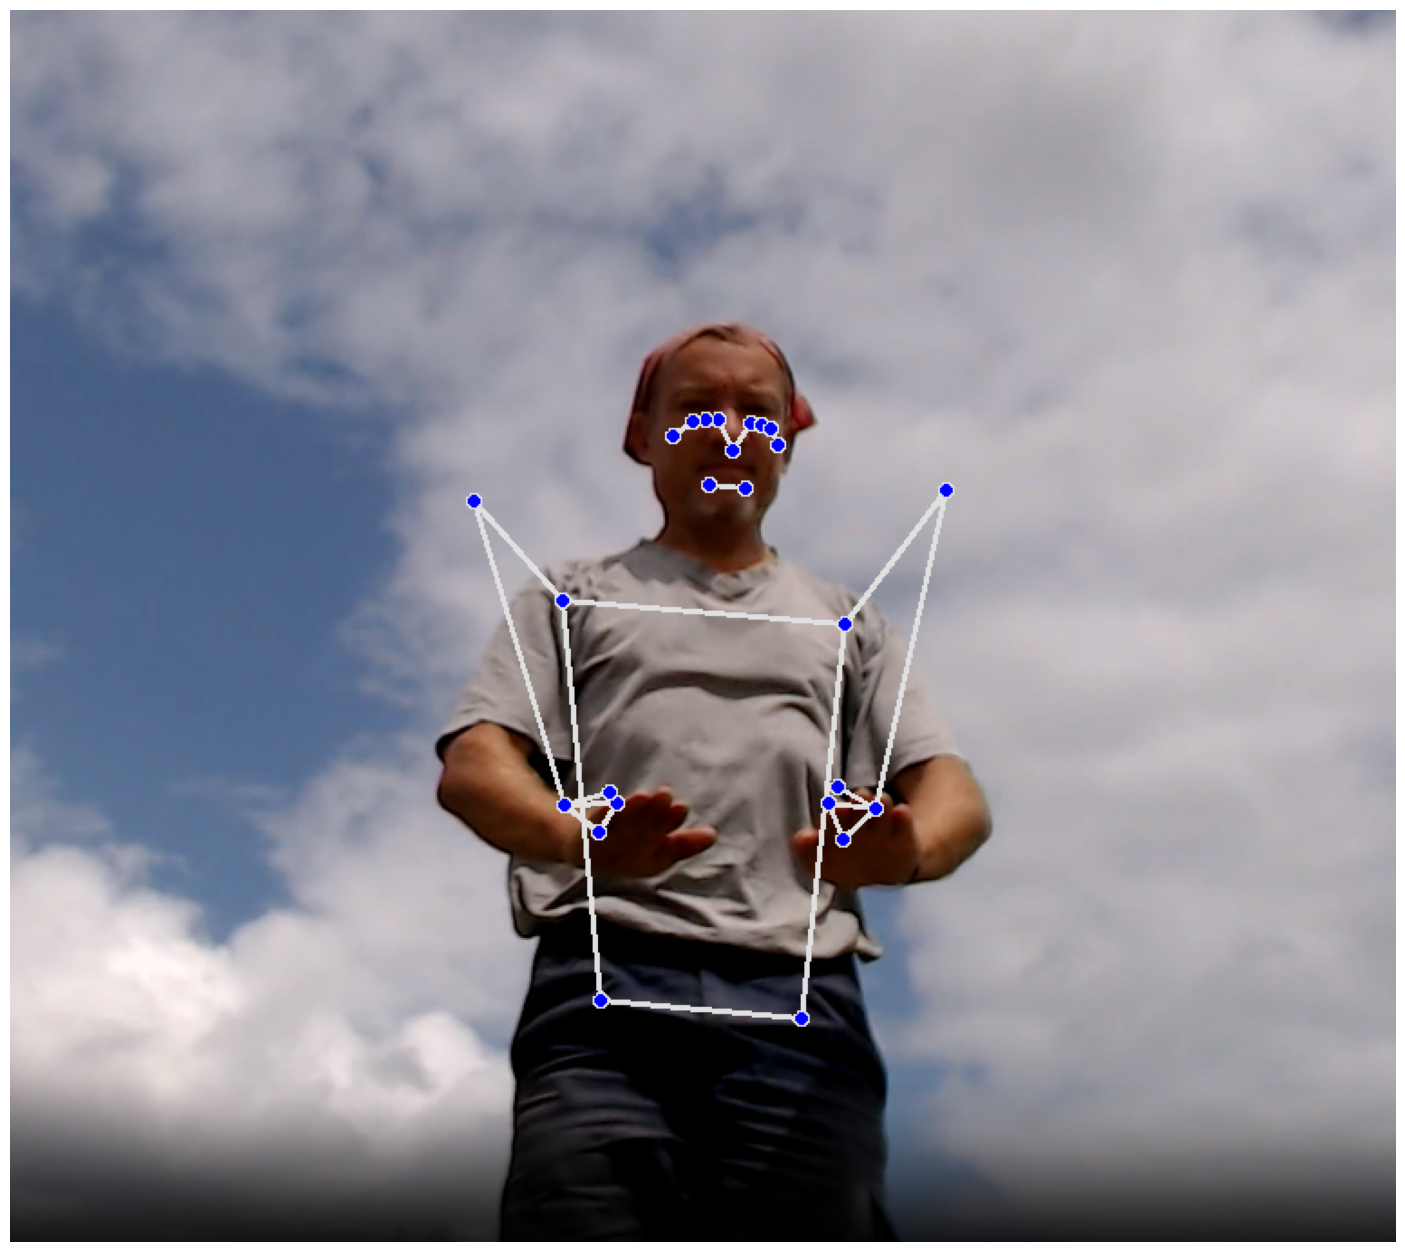

In [7]:
D_landmarks = []
frame_D = cv2.imread(reference_D)
frame_D = cv2.cvtColor(frame_D, cv2.COLOR_BGR2RGB)
frame_D_copy = frame_D.copy()
result_D = pose.process(frame_D)
height, width, _ = frame_D.shape 
if result_D.pose_landmarks:
    for idx, landmark in enumerate(result_D.pose_landmarks.landmark):
        if(landmark.visibility > 0.5):
            x_px = int(landmark.x * width)
            y_px = int(landmark.y * height)
            z_value = landmark.z  # Depth, remains normalized
            D_landmarks.append([x_px, y_px, z_value])
            print(f'Landmark {idx} in pixel coordinates: x: {x_px}, y: {y_px}, z: {z_value}')
    mp_drawing.draw_landmarks(frame_D_copy, result_D.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.figure(figsize=(24, 16))
    plt.imshow(frame_D_copy)
    plt.axis('off')
    plt.show()

In [8]:
print(calculateAngle(D_landmarks[24], D_landmarks[12], D_landmarks[14]))
print(calculateAngle(D_landmarks[13], D_landmarks[11], D_landmarks[23]))

143.7299628605457
149.16563140489112


Landmark 0 in pixel coordinates: x: 399, y: 248, z: -0.44969719648361206
Landmark 1 in pixel coordinates: x: 407, y: 234, z: -0.4205581545829773
Landmark 2 in pixel coordinates: x: 412, y: 235, z: -0.4202952980995178
Landmark 3 in pixel coordinates: x: 417, y: 236, z: -0.4198935627937317
Landmark 4 in pixel coordinates: x: 390, y: 230, z: -0.46000319719314575
Landmark 5 in pixel coordinates: x: 383, y: 229, z: -0.4601871371269226
Landmark 6 in pixel coordinates: x: 376, y: 228, z: -0.46047666668891907
Landmark 7 in pixel coordinates: x: 423, y: 246, z: -0.1790972352027893
Landmark 8 in pixel coordinates: x: 361, y: 237, z: -0.29596877098083496
Landmark 9 in pixel coordinates: x: 407, y: 268, z: -0.36670154333114624
Landmark 10 in pixel coordinates: x: 385, y: 265, z: -0.42551863193511963
Landmark 11 in pixel coordinates: x: 459, y: 338, z: 0.04089660197496414
Landmark 12 in pixel coordinates: x: 302, y: 318, z: -0.2293204367160797
Landmark 13 in pixel coordinates: x: 568, y: 375, z: -0

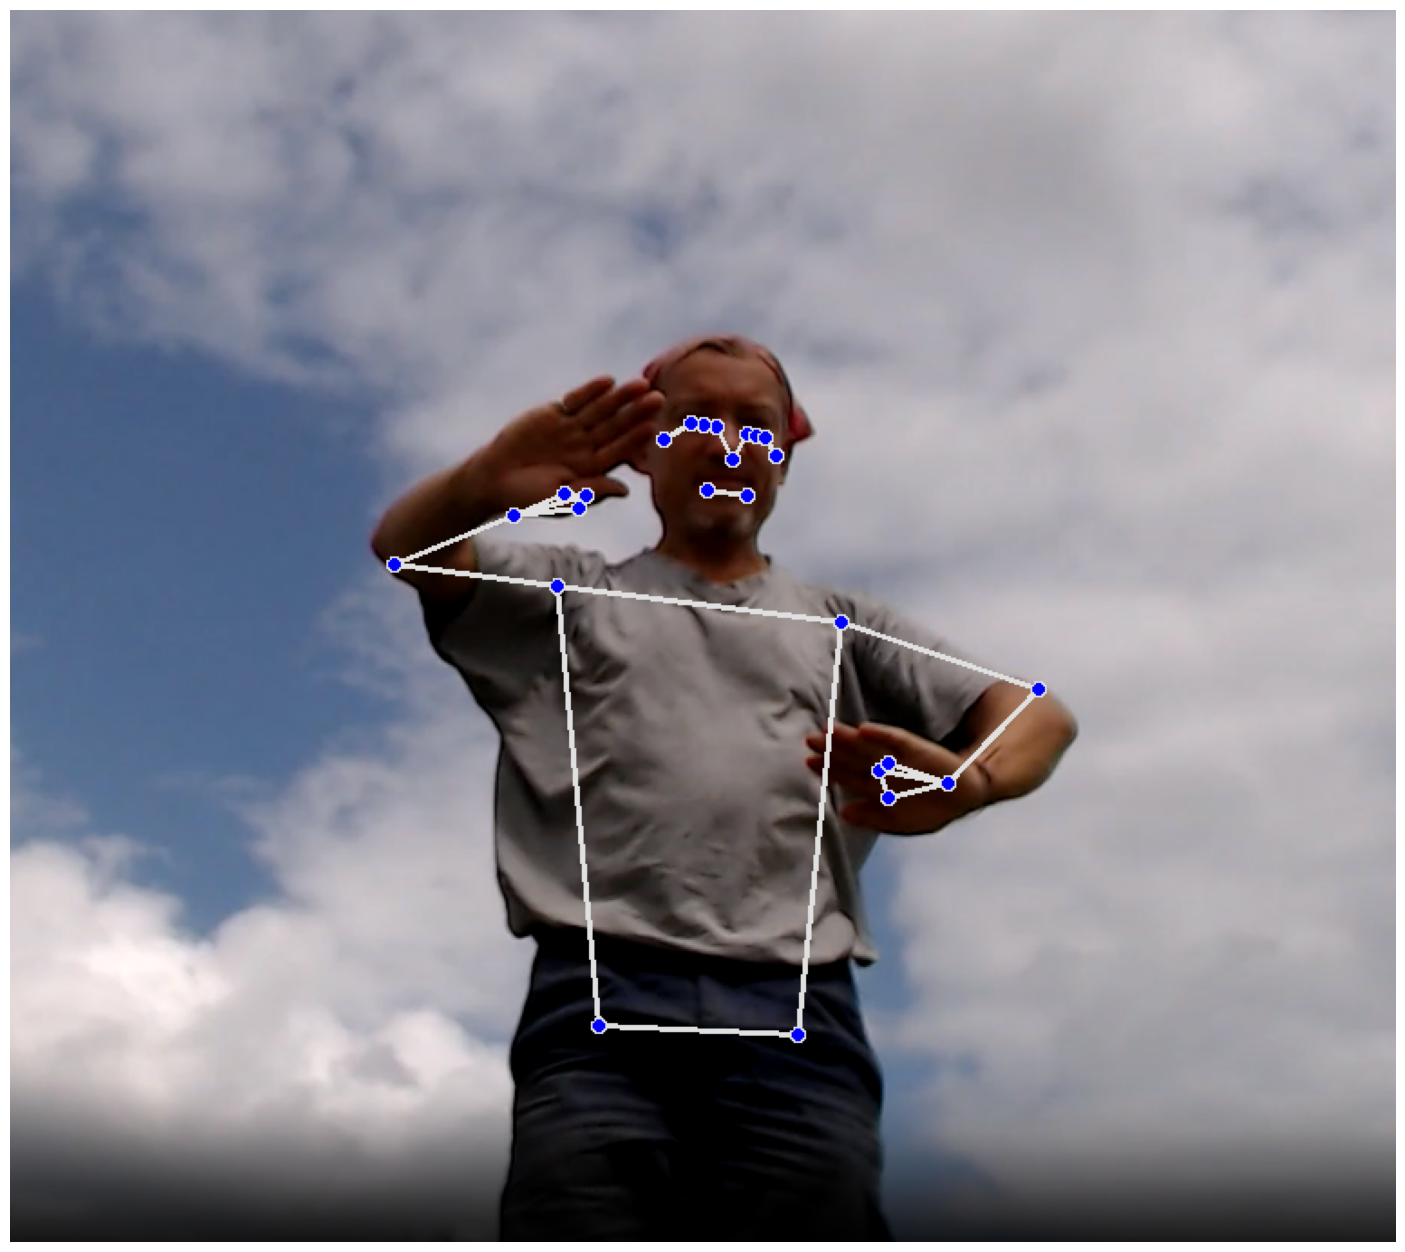

In [9]:
G_landmarks = []
frame_G = cv2.imread(reference_G)
frame_G = cv2.cvtColor(frame_G, cv2.COLOR_BGR2RGB)
frame_G_copy = frame_G.copy()
result_G = pose.process(frame_G)
height, width, _ = frame_G.shape 
if result_G.pose_landmarks:
    for idx, landmark in enumerate(result_G.pose_landmarks.landmark):
        if(landmark.visibility > 0.5):
            x_px = int(landmark.x * width)
            y_px = int(landmark.y * height)
            z_value = landmark.z  # Depth, remains normalized
            G_landmarks.append([x_px, y_px, z_value])
            print(f'Landmark {idx} in pixel coordinates: x: {x_px}, y: {y_px}, z: {z_value}')
    mp_drawing.draw_landmarks(frame_G_copy, result_G.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.figure(figsize=(24, 16))
    plt.imshow(frame_G_copy)
    plt.axis('off')
    plt.show()

In [10]:
print(calculateAngle(G_landmarks[24], G_landmarks[12], G_landmarks[14]))
print(calculateAngle(G_landmarks[13], G_landmarks[11], G_landmarks[23]))
print(calculateAngle(G_landmarks[15], G_landmarks[13], G_landmarks[11]))
print(calculateAngle(G_landmarks[12], G_landmarks[14], G_landmarks[16]))

103.00159273906297
77.25924832718341
64.87306034438654
330.1563329741962


In [11]:
def classifyPose(frame):
    ans = 'UNKNOWN'
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)
    height, width, _ = frame_rgb.shape
    landmarks = {}
    if result.pose_landmarks:
        for idx, landmark in enumerate(result.pose_landmarks.landmark):
            x_px = int(landmark.x * width)
            y_px = int(landmark.y * height)
            z_value = landmark.z  # Depth, remains normalized
            landmarks[idx] = [x_px, y_px, z_value]
    LEFT_SHOULDER_ANGLE = calculateAngle(landmarks[24], landmarks[12], landmarks[14])
    RIGHT_SHOULDER_ANGLE = calculateAngle(landmarks[13], landmarks[11], landmarks[23])
    LEFT_ELMBOW_ANGLE = calculateAngle(landmarks[12], landmarks[14], landmarks[16])
    RIGHT_ELMBOW_ANGLE = calculateAngle(landmarks[15], landmarks[13], landmarks[11])
    if(LEFT_SHOULDER_ANGLE > 125 and LEFT_SHOULDER_ANGLE <= 160 and RIGHT_SHOULDER_ANGLE > 125 and RIGHT_SHOULDER_ANGLE<=160):
        ans = 'Eurythmic A'
    elif(LEFT_SHOULDER_ANGLE <= 125 and LEFT_SHOULDER_ANGLE > 75 and RIGHT_SHOULDER_ANGLE > 50 and RIGHT_SHOULDER_ANGLE <= 100):
        ans = 'Eurythmic G'
    elif(LEFT_SHOULDER_ANGLE > 25 and LEFT_SHOULDER_ANGLE <= 50 and RIGHT_SHOULDER_ANGLE > 25 and RIGHT_SHOULDER_ANGLE <= 50 and RIGHT_ELMBOW_ANGLE > 40 and RIGHT_ELMBOW_ANGLE <= 110 and LEFT_ELMBOW_ANGLE > 40 and LEFT_ELMBOW_ANGLE <= 110):
        ans = 'Eurythmic D'
    mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    position = (150, 150)  # (x, y) coordinates of the bottom-left corner of the text
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 4
    color = (255, 0, 0)  # Blue color in BGR
    thickness = 2  # Thickness of the text
    cv2.putText(frame, ans, position, font, font_scale, color, thickness, cv2.LINE_AA)
    return frame

In [12]:
classifyPose(frame_G)

array([[[145, 149, 161],
        [145, 149, 161],
        [145, 149, 161],
        ...,
        [179, 175, 184],
        [180, 176, 185],
        [181, 177, 184]],

       [[145, 149, 161],
        [145, 149, 161],
        [145, 149, 161],
        ...,
        [183, 179, 188],
        [184, 180, 189],
        [184, 180, 188]],

       [[145, 147, 161],
        [145, 147, 161],
        [145, 147, 161],
        ...,
        [185, 180, 189],
        [185, 180, 189],
        [185, 180, 189]],

       ...,

       [[ 25,  25,  26],
        [ 24,  25,  25],
        [ 24,  24,  25],
        ...,
        [ 31,  31,  32],
        [ 31,  31,  32],
        [ 31,  31,  32]],

       [[ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  23],
        ...,
        [ 28,  28,  29],
        [ 28,  28,  29],
        [ 28,  28,  29]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 27,  27,  28],
        [ 27,  27,  27],
        [ 27,  27,  28]]

In [14]:
cap = cv2.VideoCapture('data/all_videos/BE1_M_WIN_20240717_13_27_50_Pro.mp4')
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    frame_with_pose = classifyPose(frame)
    cv2.imshow('Pose Detection', frame_with_pose)
    if cv2.waitKey(5) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object fi